## Accessing the Population Estimation Service
The POPGRID population estimation service has a REST endpoint that accepts requests with polygon geometries and returns population estimates within those geometries. The endpoint can be accessed using Esri's Python module (arcpy), or with just built-in Python modules. The code below does not require arcpy or any additional modules, just Python 3. 

The endpoint is self-describing, see: https://sedac.ciesin.columbia.edu/arcgis/rest/services/ciesin/popgrid_tools/GPServer

In [162]:
# imports
import json
import requests
import matplotlib.pyplot as plt
%matplotlib notebook

In [164]:
# read in json file
with open('./data/col_subset.geojson', 'r') as f:
    data = json.load(f)
data.keys()


dict_keys(['type', 'name', 'crs', 'features'])

In [165]:

# dictionary for results
stats_results = {}

# build request for each polygon and append it to the results
for feature in data['features']:
    # shape ID
    id = f'{feature["properties"]["shapeID"]}'
    # geometry and parameters
    input_data = {
        'polygon': feature['geometry']['coordinates'][0],
        'variables': 'landscan-population-count_2015_1km',
        'statistics': ['SUM','MEAN'], 
        'requestID': id
    }
    # request parameters
    request_params = {
        'Input_Data': str(input_data),
        'f': 'pjson',
        
    }

    url = 'https://sedac.ciesin.columbia.edu/arcgis/rest/services/ciesin/popgrid_tools/GPServer/popgrid_estimation/execute?'

    # post the request
    r = requests.post(
        url,
        params=request_params,
    )

    # parse the reeu
    if str(r) == '<Response [200]>':
        stats_results[id] = r.json()
        print(f'Request {id} successful')
    else:
        print('Error')
        print(r)

Request COL-ADM2-3_0_0-B307 successful
Request COL-ADM2-3_0_0-B316 successful
Request COL-ADM2-3_0_0-B319 successful
Request COL-ADM2-3_0_0-B324 successful
Request COL-ADM2-3_0_0-B329 successful
Request COL-ADM2-3_0_0-B344 successful
Request COL-ADM2-3_0_0-B352 successful
Request COL-ADM2-3_0_0-B353 successful
Request COL-ADM2-3_0_0-B355 successful
Request COL-ADM2-3_0_0-B358 successful
Request COL-ADM2-3_0_0-B359 successful
Request COL-ADM2-3_0_0-B361 successful
Request COL-ADM2-3_0_0-B365 successful
Request COL-ADM2-3_0_0-B372 successful
Request COL-ADM2-3_0_0-B380 successful
Request COL-ADM2-3_0_0-B534 successful
Request COL-ADM2-3_0_0-B539 successful
Request COL-ADM2-3_0_0-B543 successful
Request COL-ADM2-3_0_0-B544 successful
Request COL-ADM2-3_0_0-B548 successful
Request COL-ADM2-3_0_0-B549 successful
Request COL-ADM2-3_0_0-B562 successful
Request COL-ADM2-3_0_0-B564 successful


In [166]:
# example result
stats_results['COL-ADM2-3_0_0-B307']

{'results': [{'paramName': 'Response',
   'dataType': 'GPString',
   'value': {'estimates': {'landscan-population-count_2015_1km': {'SUM': '13792',
      'SHORTTITLE': 'LandScan Population Count 2015',
      'UNIT': 'persons',
      'MEAN': '265.230769231'}},
    'resultCode': 0,
    'message': 'Request Succeeded',
    'requestID': 'COL-ADM2-3_0_0-B307'}}],
 'messages': []}

In [167]:
totals = []
for stats in stats_results.values():
    totals.append(float(stats['results'][0]['value']['estimates']['landscan-population-count_2015_1km']['SUM']))
len(totals)

23

<IPython.core.display.Javascript object>


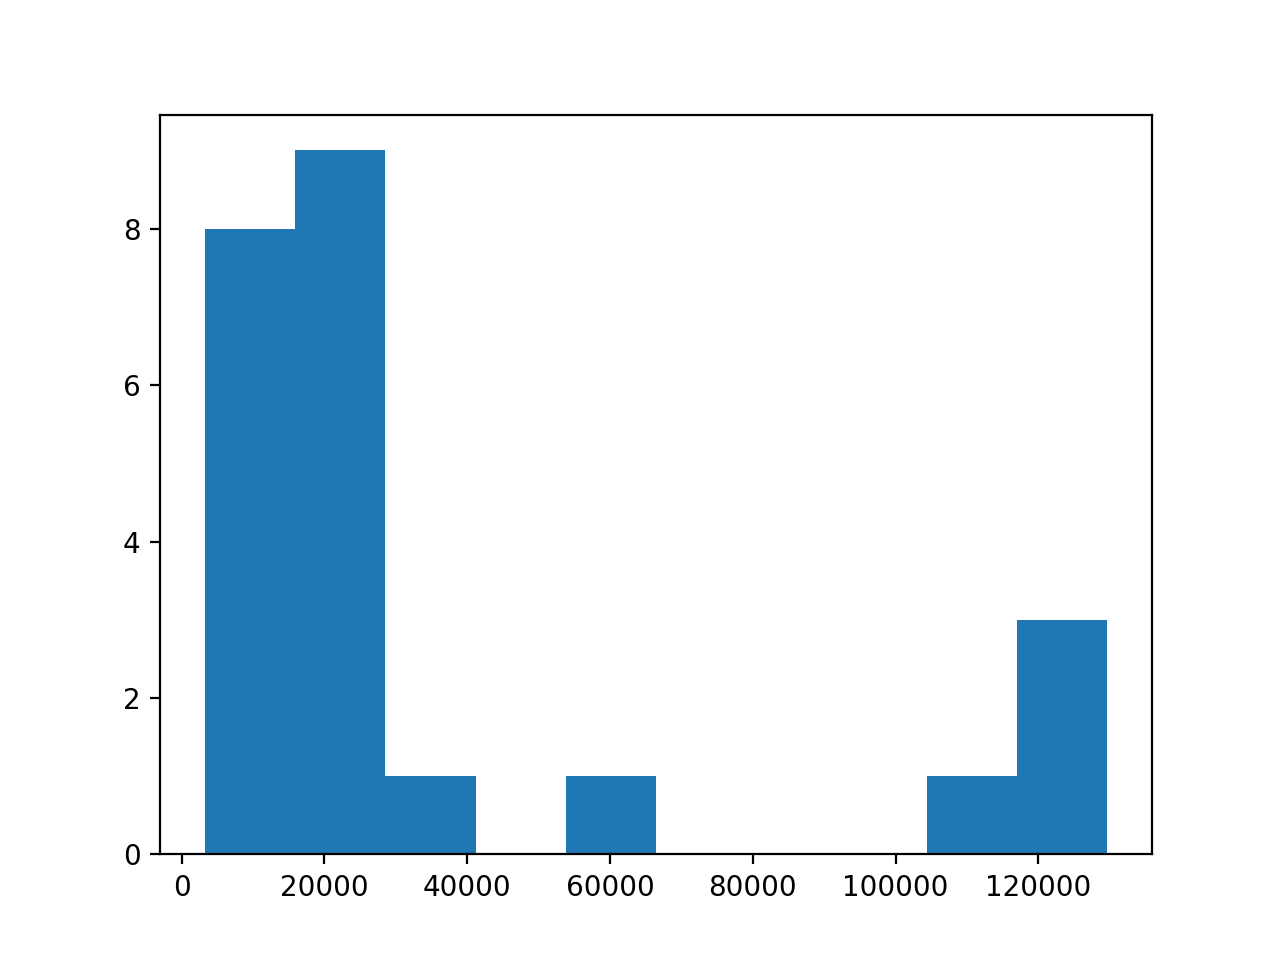

In [169]:
_ = plt.hist(totals)

<IPython.core.display.Javascript object>


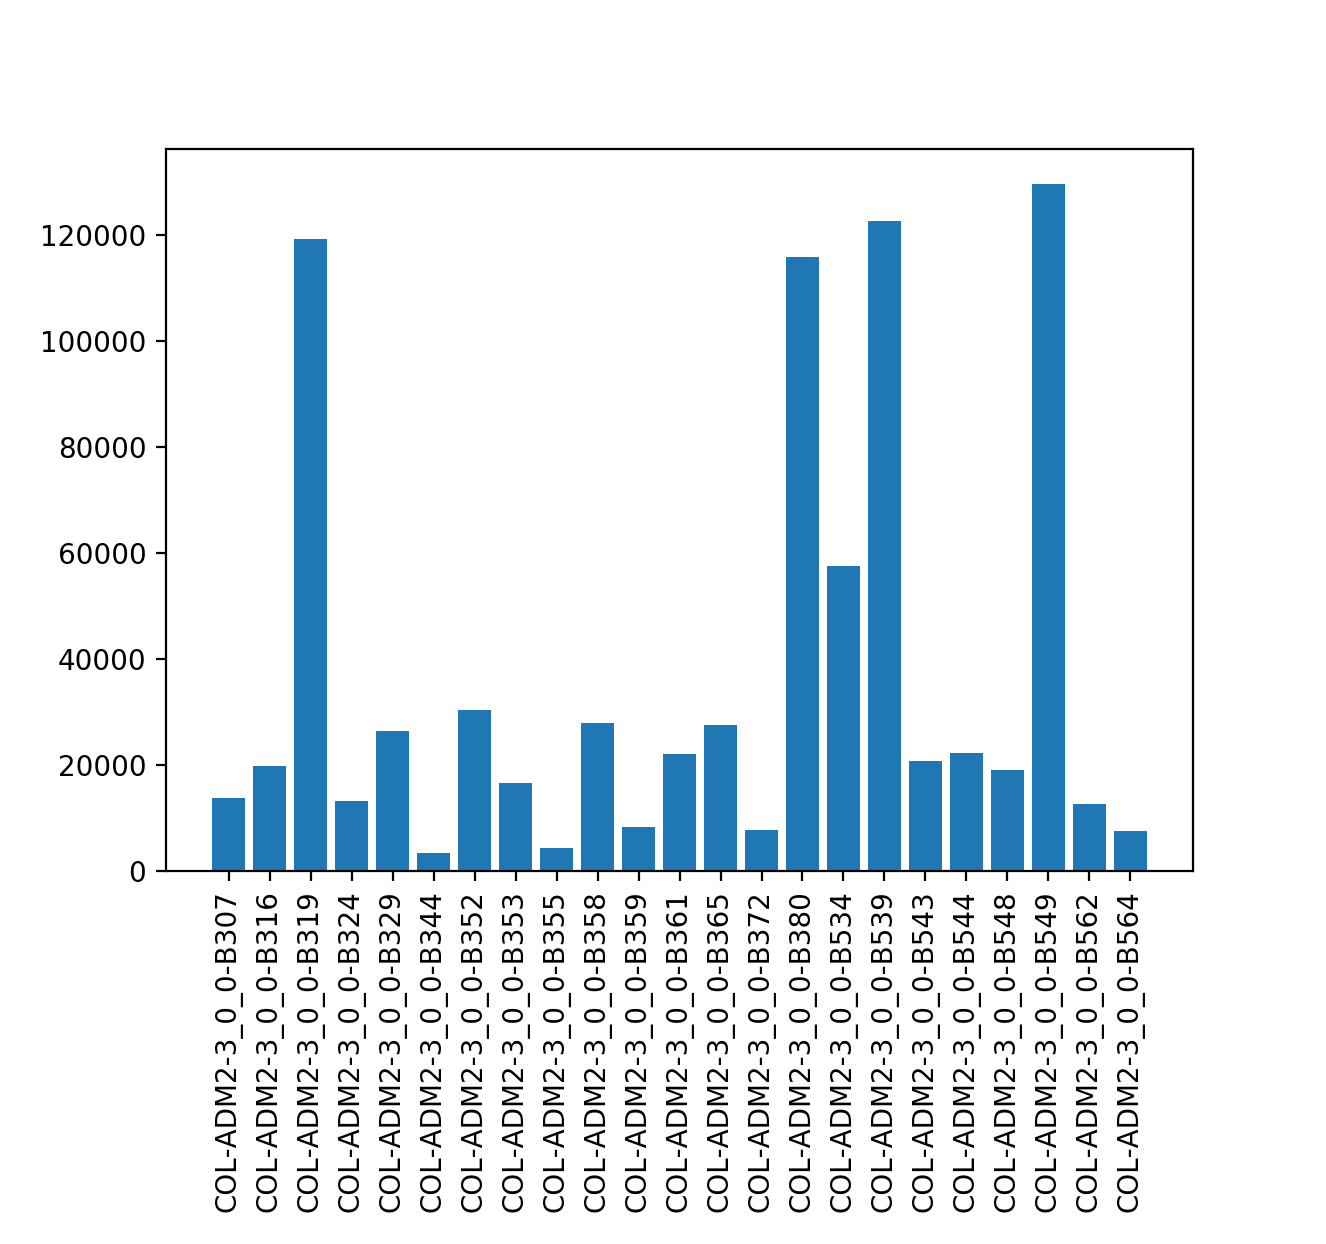

In [170]:
ax = plt.bar(stats_results.keys(), totals)
_ = plt.xticks(list(stats_results.keys()), rotation=90)
_ = plt.subplots_adjust(bottom=0.3)